In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data_consumer_expenditure_survey.csv',na_values='\N')

In [3]:
df.head()

,newid,age,educatio,race,sex,weeksin,emplcont,incoll,nonwork,marital,...,alc_tob,domestic_svcs,ent,other_nd,nondurable,nondurable_housing,nondurable_core,work_related,nondurable_housing_adj,nondurable_core_food
0,113440,52,39,1,1,52,1,3,NaN,1,...,11.826665,466.243317,1589.000000,1338.644287,20788.58789,32408.47070,19467.87500,5507.252441,32396.64453,26889.39063
1,82908,33,3,4,1,52,2,NaN,NaN,1,...,945.438782,0.000000,42.733170,309.255219,10802.04004,16058.60449,7372.13916,1960.971924,15113.16602,13152.19434
2,110538,43,44,1,2,52,1,3,NaN,5,...,2274.658447,764.664917,1974.000000,764.952881,22745.26172,32992.65234,16631.12500,11701.174800,30717.99414,19016.82031
3,104594,56,39,1,1,52,1,3,NaN,1,...,1562.281250,502.284454,2250.523926,486.142120,31393.90234,44875.84375,23829.46680,16425.265630,43313.56250,26888.29688
4,91105,43,10,1,2,52,2,NaN,NaN,3,...,212.223557,531.177673,1255.368652,0.000000,19449.93750,39009.71484,25111.01367,8005.277344,38797.49219,30792.21484


In [4]:
df.duplicated().sum()

0

In [5]:
## Locate and print features with null values
for feat in df.columns:
    if df[str(feat)].isnull().sum() != 0:
        num_nans = df[str(feat)].isnull().sum()
        print feat, num_nans
        

emplcont 3921
incoll 1657
nonwork 9163
empstat 2956
emptype 2945
occup 44
indust 12064
govhous 593
sex_spouse 4528
age_spouse 4528
empstat_spouse 6738
emptype_spouse 6710
hrswkd_spouse 4528
wkswkd_spouse 4528
wage_spouse 4528


In [6]:
## Drop column with too many nans
df = df.drop('indust',1)
#df.drop('nonwork',1)

In [7]:
df.describe()

,newid,age,educatio,race,sex,weeksin,emplcont,incoll,nonwork,marital,...,alc_tob,domestic_svcs,ent,other_nd,nondurable,nondurable_housing,nondurable_core,work_related,nondurable_housing_adj,nondurable_core_food
count,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,8143.000000,10407.000000,2901.000000,12064.000000,...,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000
mean,93869.305869,49.713528,36.989390,1.222729,1.393816,51.884698,1.556674,2.932738,3.755257,1.885527,...,765.382462,725.895307,1489.785427,1193.841125,18732.072673,29419.883990,16904.166196,7577.647242,28654.501520,21076.854297
std,12488.818491,12.611758,10.903671,0.644230,0.488615,1.818522,0.496808,0.293258,1.716877,1.353988,...,1027.670198,1312.222987,1732.478773,3675.680700,11301.174740,15895.145900,10555.490875,5423.041769,15673.408432,11577.734034
min,70428.000000,28.000000,0.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,1283.823486,3104.556396,1243.658569,36.757008,2518.541260,2032.416748
25%,83136.500000,39.000000,39.000000,1.000000,1.000000,52.000000,1.000000,3.000000,2.000000,1.000000,...,30.915649,71.491043,535.808228,0.000000,11587.568602,19003.721190,10276.582763,3908.055359,18344.997557,13691.067872
50%,92833.500000,48.000000,40.000000,1.000000,1.000000,52.000000,2.000000,3.000000,5.000000,1.000000,...,372.807343,390.159348,1021.301269,318.104370,16653.043945,26359.995115,14654.350095,6376.739258,25587.085940,18750.054685
75%,104997.000000,59.000000,43.000000,1.000000,2.000000,52.000000,2.000000,3.000000,5.000000,3.000000,...,1143.811004,860.171631,1858.622803,1288.576172,23092.725095,36110.059575,20898.536133,9796.965088,35291.596680,25727.223142
max,115811.000000,75.000000,46.000000,4.000000,2.000000,52.000000,2.000000,3.000000,6.000000,5.000000,...,14704.000000,34358.078130,36605.800780,225315.984400,332322.000000,366214.906300,292687.906300,80179.179690,351510.906300,302277.906300


In [8]:
df.head()

,newid,age,educatio,race,sex,weeksin,emplcont,incoll,nonwork,marital,...,alc_tob,domestic_svcs,ent,other_nd,nondurable,nondurable_housing,nondurable_core,work_related,nondurable_housing_adj,nondurable_core_food
0,113440,52,39,1,1,52,1,3,NaN,1,...,11.826665,466.243317,1589.000000,1338.644287,20788.58789,32408.47070,19467.87500,5507.252441,32396.64453,26889.39063
1,82908,33,3,4,1,52,2,NaN,NaN,1,...,945.438782,0.000000,42.733170,309.255219,10802.04004,16058.60449,7372.13916,1960.971924,15113.16602,13152.19434
2,110538,43,44,1,2,52,1,3,NaN,5,...,2274.658447,764.664917,1974.000000,764.952881,22745.26172,32992.65234,16631.12500,11701.174800,30717.99414,19016.82031
3,104594,56,39,1,1,52,1,3,NaN,1,...,1562.281250,502.284454,2250.523926,486.142120,31393.90234,44875.84375,23829.46680,16425.265630,43313.56250,26888.29688
4,91105,43,10,1,2,52,2,NaN,NaN,3,...,212.223557,531.177673,1255.368652,0.000000,19449.93750,39009.71484,25111.01367,8005.277344,38797.49219,30792.21484


In [9]:
#from sklearn.preprocessing import Imputer
## Replace nans with column mean
#imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
#imr = imr.fit(df)
#imputed_data = imr.transform(df.values)

In [10]:
## fill NaNs with column mean
df_filled = df.fillna(df.mean())

In [11]:
df_filled.head()

,newid,age,educatio,race,sex,weeksin,emplcont,incoll,nonwork,marital,...,alc_tob,domestic_svcs,ent,other_nd,nondurable,nondurable_housing,nondurable_core,work_related,nondurable_housing_adj,nondurable_core_food
0,113440,52,39,1,1,52,1,3.000000,3.755257,1,...,11.826665,466.243317,1589.000000,1338.644287,20788.58789,32408.47070,19467.87500,5507.252441,32396.64453,26889.39063
1,82908,33,3,4,1,52,2,2.932738,3.755257,1,...,945.438782,0.000000,42.733170,309.255219,10802.04004,16058.60449,7372.13916,1960.971924,15113.16602,13152.19434
2,110538,43,44,1,2,52,1,3.000000,3.755257,5,...,2274.658447,764.664917,1974.000000,764.952881,22745.26172,32992.65234,16631.12500,11701.174800,30717.99414,19016.82031
3,104594,56,39,1,1,52,1,3.000000,3.755257,1,...,1562.281250,502.284454,2250.523926,486.142120,31393.90234,44875.84375,23829.46680,16425.265630,43313.56250,26888.29688
4,91105,43,10,1,2,52,2,2.932738,3.755257,3,...,212.223557,531.177673,1255.368652,0.000000,19449.93750,39009.71484,25111.01367,8005.277344,38797.49219,30792.21484


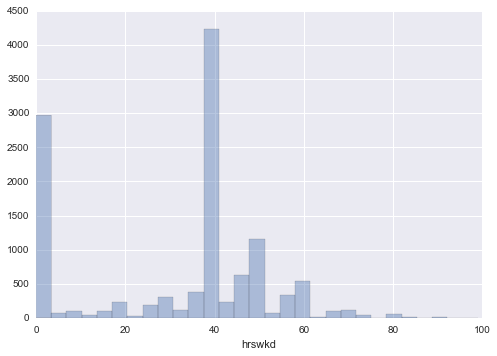

In [12]:
sns.distplot(df_filled.hrswkd,kde=False)

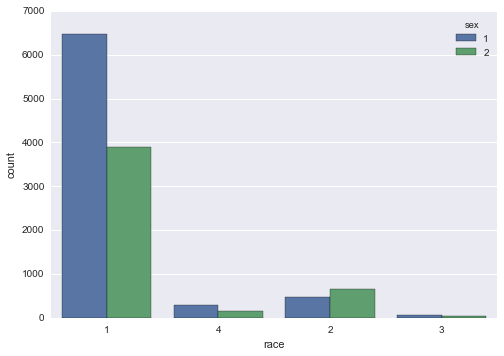

In [13]:
sns.countplot(df_filled.race,hue=df.sex)
## Huge bias towards white

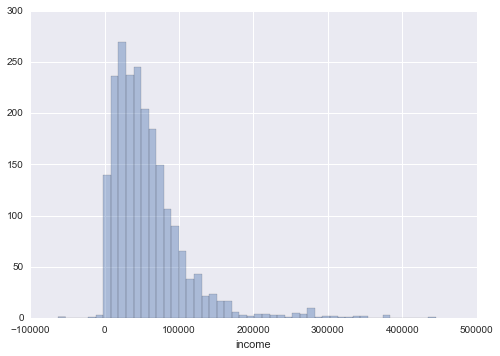

In [14]:
## Income by location
sns.distplot(df_filled.income[df_filled.region==1],kde=False)

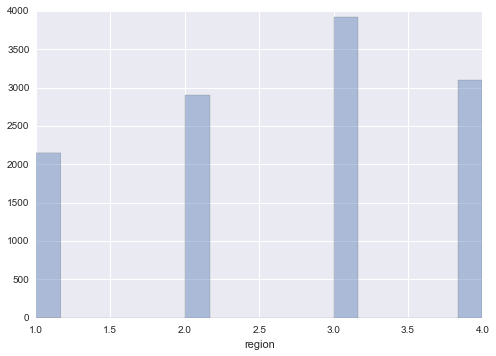

In [15]:
sns.distplot(df_filled.region,kde=False)

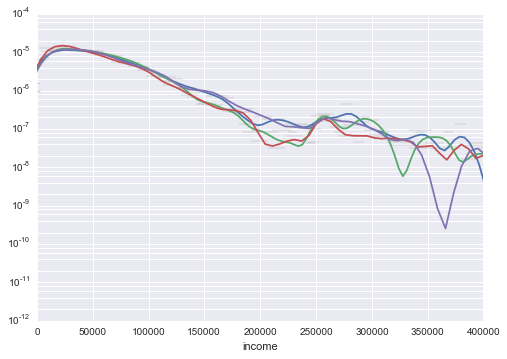

In [16]:
sns.distplot(df_filled.income[df_filled.region==1])
sns.distplot(df_filled.income[df_filled.region==2])
sns.distplot(df_filled.income[df_filled.region==3])
sns.distplot(df_filled.income[df_filled.region==4])
plt.xlim(0.0,4E5)
plt.yscale('log')

In [17]:
df_filled.columns[:20]

Index([u'newid', u'age', u'educatio', u'race', u'sex', u'weeksin', u'emplcont',
       u'incoll', u'nonwork', u'marital', u'empstat', u'emptype', u'hrswkd',
       u'wkswkd', u'occup', u'fedtax', u'gvpremia', u'pripemia', u'rrpremia',
       u'statax'],
      dtype='object')

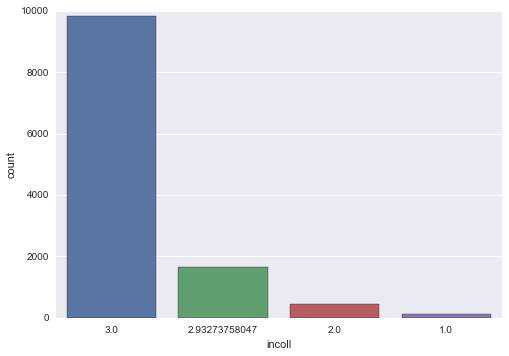

In [18]:
sns.countplot(df_filled.incoll)
## Most samples have no college 

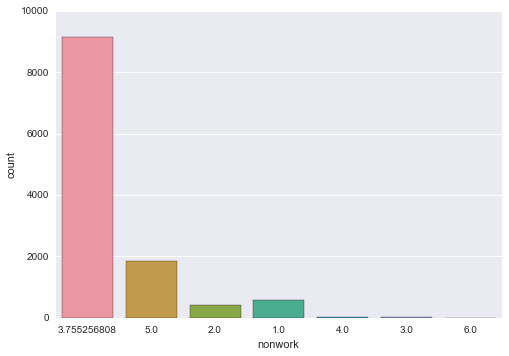

In [19]:
sns.countplot(df_filled.nonwork)
## the main reason for not working (5) is
## that folks are retired. The next reason is illness (1).
## Note: 3.75 is the average filled in for NaNs.

In [20]:
'''
Insight #1

The samples has a large portion of retired folks who have never went to college.
'''

'\nInsight #1\n\nThe samples has a large portion of retired folks who have never went to college.\n'

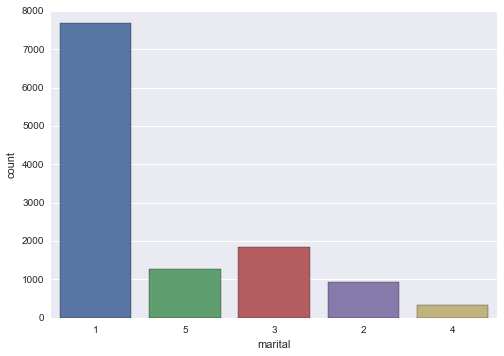

In [21]:
sns.countplot(df_filled.marital)
## Most folks are married (1). Some are divorced (3).

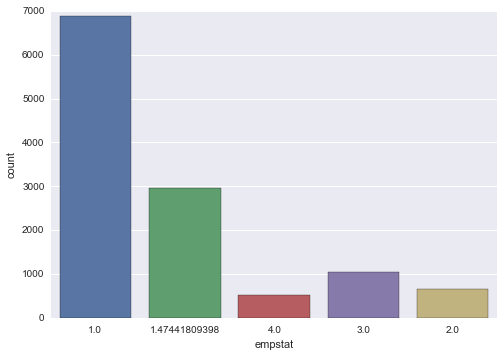

In [22]:
sns.countplot(df_filled.empstat)

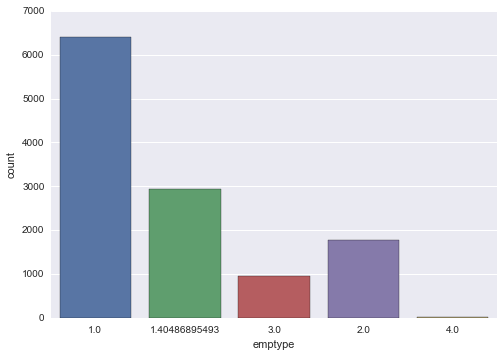

In [23]:
sns.countplot(df_filled.emptype)
## most work for private companies (1) or are govt employee (2)

In [24]:
df_filled.columns[:100]

Index([u'newid', u'age', u'educatio', u'race', u'sex', u'weeksin', u'emplcont',
       u'incoll', u'nonwork', u'marital', u'empstat', u'emptype', u'hrswkd',
       u'wkswkd', u'occup', u'fedtax', u'gvpremia', u'pripemia', u'rrpremia',
       u'statax', u'farminc', u'irakeogh', u'fica', u'businc', u'wage',
       u'socbens', u'ssi', u'lag_fedtax', u'lag_gvpremia', u'lag_pripemia',
       u'lag_rrpremia', u'lag_statax', u'lag_farminc', u'lag_irakeogh',
       u'lag_fica', u'lag_businc', u'lag_wage', u'lag_socbens', u'lag_ssi',
       u'file', u'blsurbn', u'region', u'cutenur', u'govhous', u'pubhous',
       u'repstat', u'srepstat', u'totwt', u'adjwt', u'numearn', u'numauto',
       u'vehq', u'membcnt', u'wages', u'bus', u'farm', u'rents', u'div',
       u'interest', u'pension', u'socsec', u'unemp', u'workcomp', u'welfare',
       u'scholar', u'foodstmp', u'sspremia', u'pproptax', u'othtax', u'nontax',
       u'foodhome', u'foodout', u'foodwork', u'tobacco', u'alcohol',
       u'niteclub'